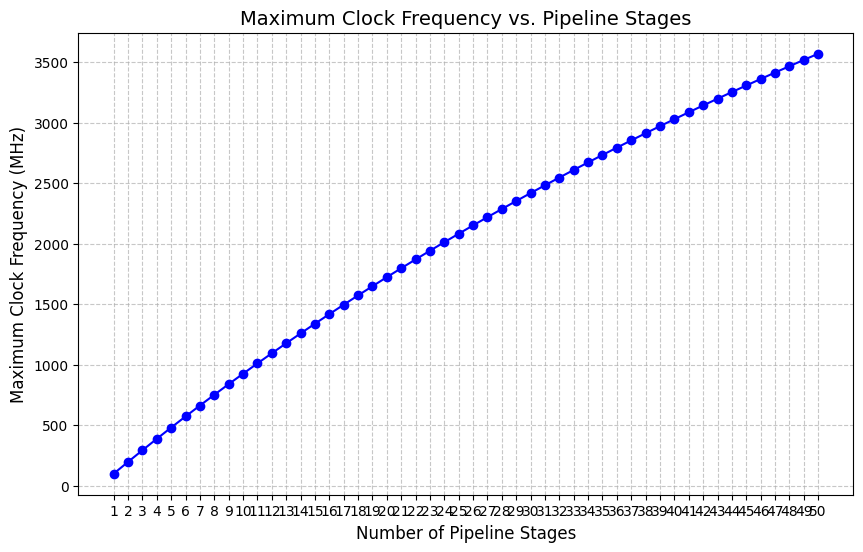

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 51)  # Vary stages from 1 to 50
# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pipeline_stages)
plt.show()

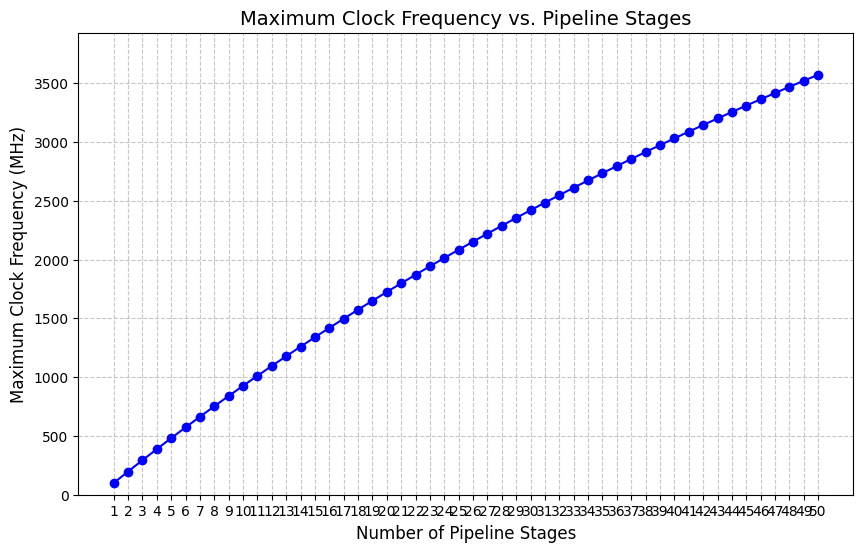

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 51)  # Vary stages from 1 to 50
# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pipeline_stages)
plt.ylim(0, np.max(frequencies_mhz) * 1.1)  # Adjust y-axis for better visibility
plt.show()

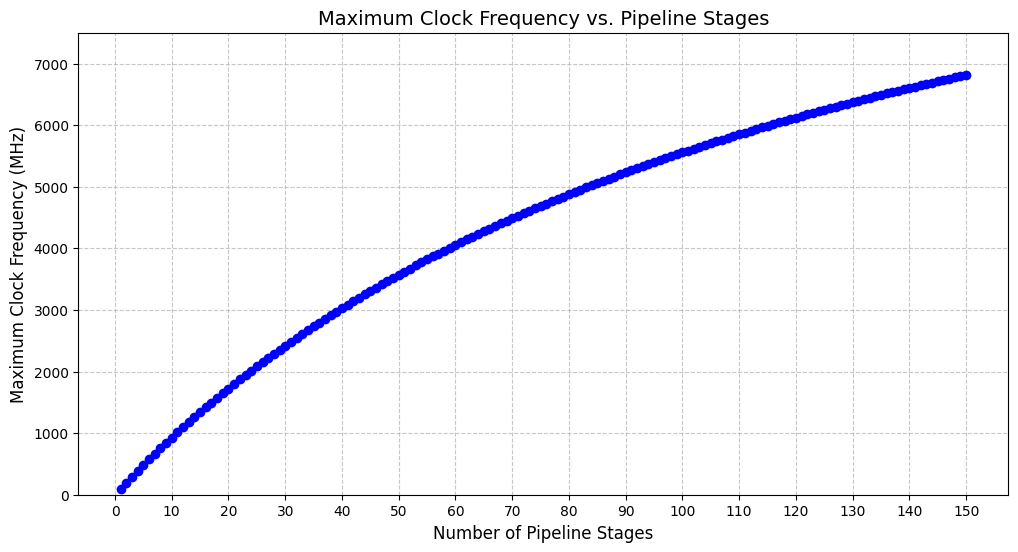

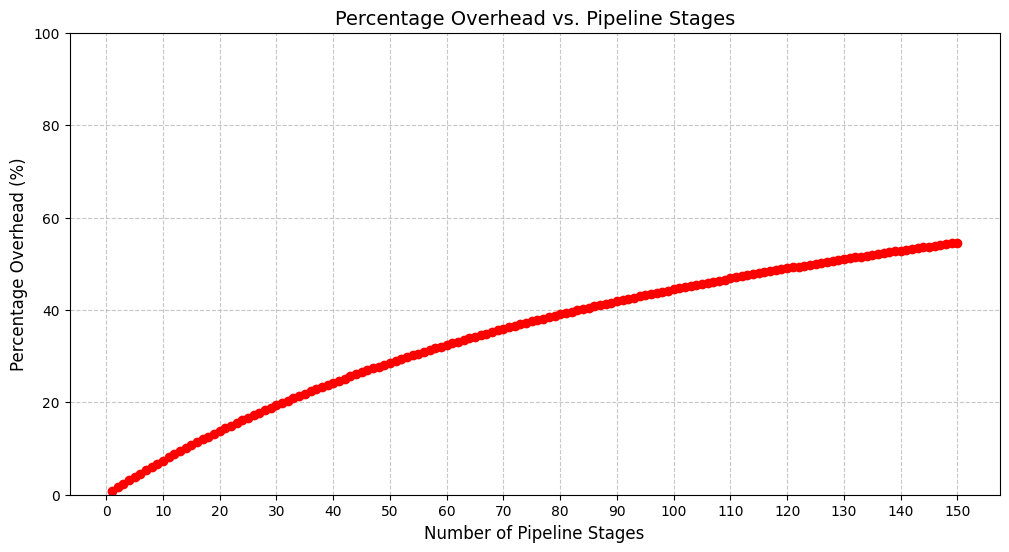

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 151)  # Vary stages from 1 to 150

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate percentage overhead for each pipeline stage
percent_overhead = (T_latch_latency / ((T_critical_path / pipeline_stages) + T_latch_latency)) * 100

# Plotting Maximum Clock Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting Percentage Overhead
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, percent_overhead, marker='o', linestyle='-', color='red')
plt.title('Percentage Overhead vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Percentage Overhead (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, 100)
plt.show()

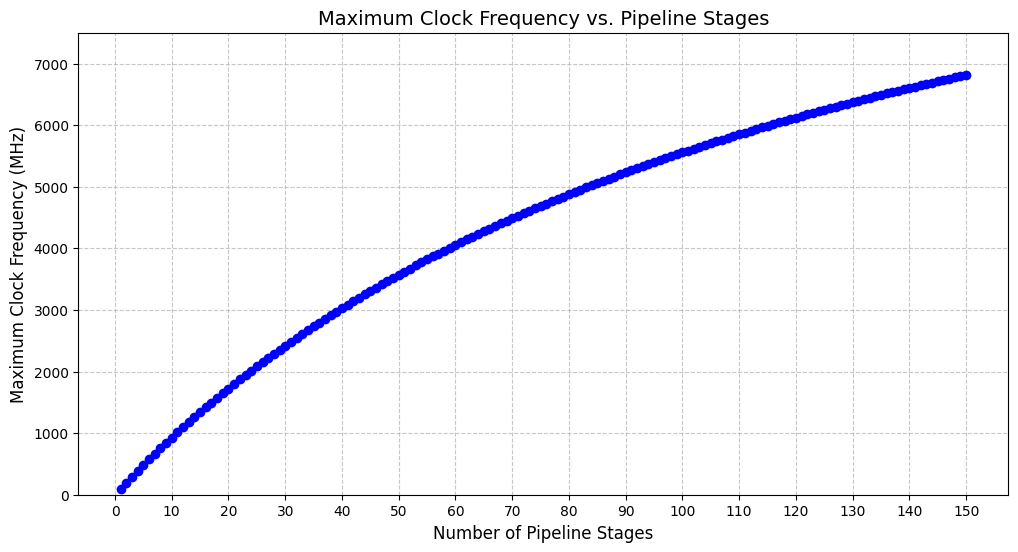

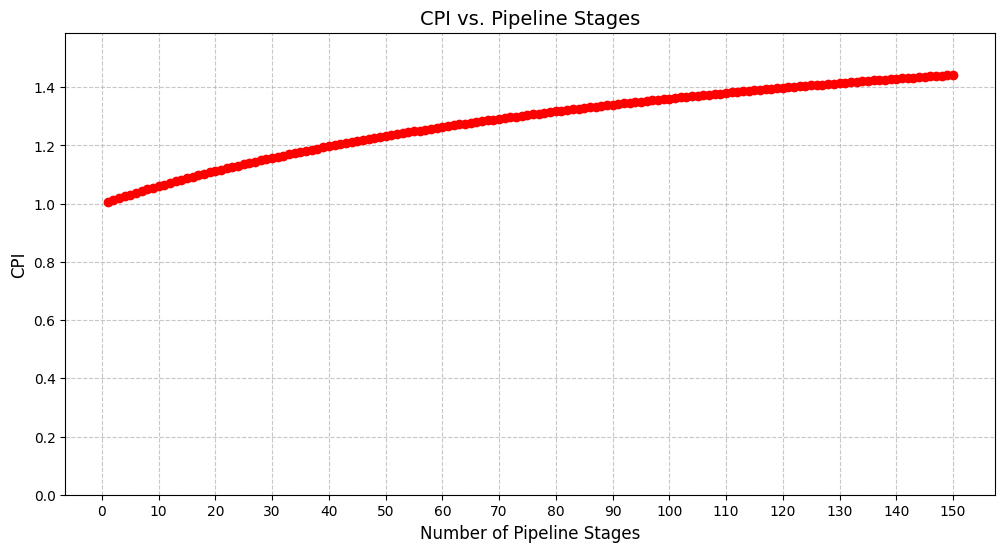

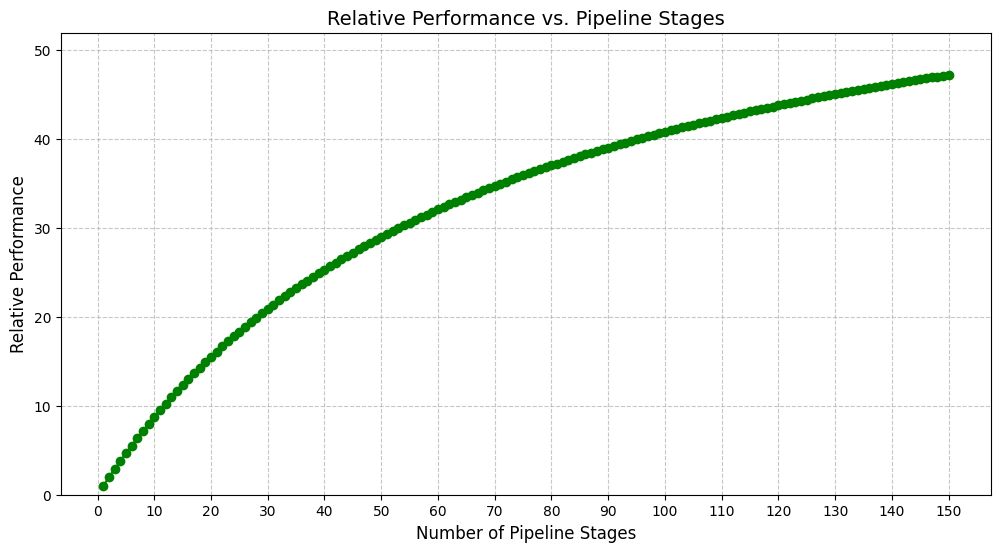

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
branch_resolution_latency = 6.5e-9  # Branch resolution latency in seconds (6.5 ns)
branch_frequency = 0.2  # 1 in 5 instructions are branches
branch_misprediction_rate = 0.05  # 95% accuracy

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 151)  # Vary stages from 1 to 150

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate CPI for each pipeline stage
cycle_time = 1 / frequencies  # Cycle time in seconds
branch_penalty_cycles = branch_resolution_latency / cycle_time
cpi_branch = branch_frequency * branch_misprediction_rate * branch_penalty_cycles
cpi = 1 + cpi_branch  # Total CPI

# Calculate performance relative to the non-pipelined implementation
non_pipelined_frequency = 1 / T_critical_path  # Non-pipelined frequency
non_pipelined_cpi = 1  # CPI for non-pipelined implementation
non_pipelined_performance = non_pipelined_frequency / non_pipelined_cpi
performance_relative = (frequencies / cpi) / non_pipelined_performance

# Plotting Maximum Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting CPI
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, cpi, marker='o', linestyle='-', color='red')
plt.title('CPI vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(cpi) * 1.1)
plt.show()

# Plotting Relative Performance
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, performance_relative, marker='o', linestyle='-', color='green')
plt.title('Relative Performance vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Relative Performance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(performance_relative) * 1.1)
plt.show()


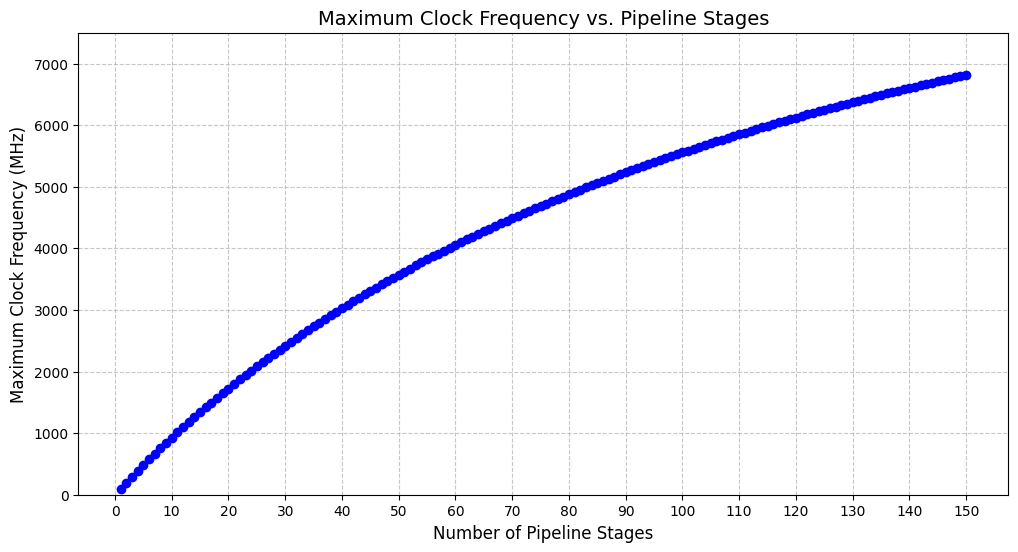

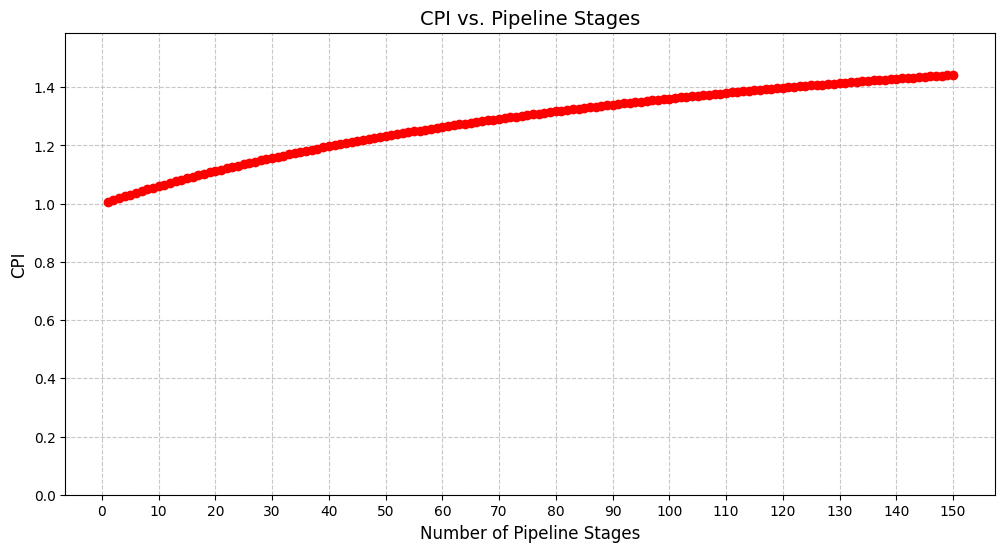

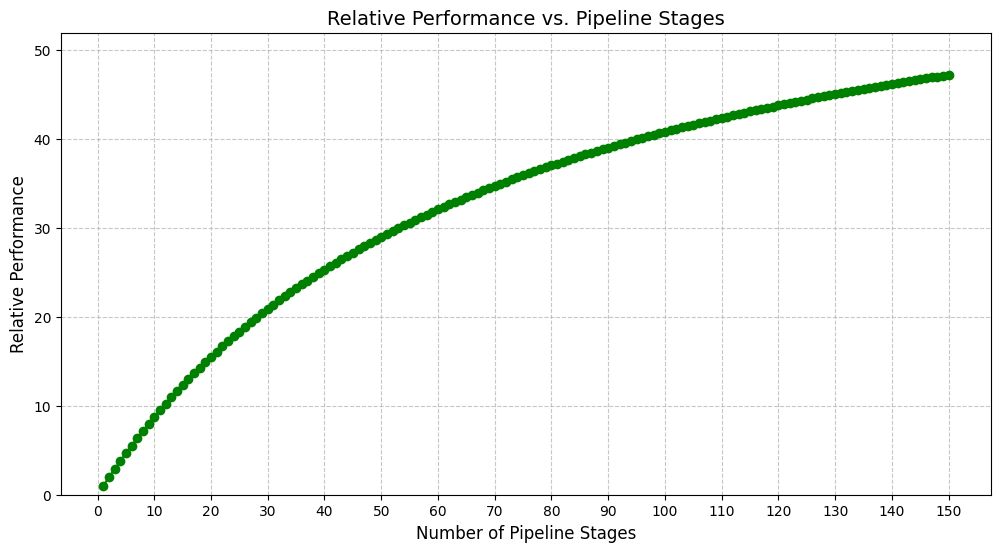

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
T_branch_resolution = 6.5e-9  # Branch resolution latency in seconds (6.5 ns)
branch_frequency = 0.2  # 1 in 5 instructions are branches
branch_misprediction_rate = 0.05  # 95% branch prediction accuracy

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 151)  # Vary stages from 1 to 150

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate CPI for each pipeline stage
cycle_time = 1 / frequencies  # Cycle time in seconds
branch_penalty_cycles = T_branch_resolution / cycle_time
cpi_branch = branch_frequency * branch_misprediction_rate * branch_penalty_cycles
cpi = 1 + cpi_branch  # Total CPI

# Calculate performance relative to the non-pipelined implementation
non_pipelined_frequency = 1 / T_critical_path  # Non-pipelined frequency
non_pipelined_cpi = 1  # CPI for non-pipelined implementation
non_pipelined_performance = non_pipelined_frequency / non_pipelined_cpi
performance_relative = (frequencies / cpi) / non_pipelined_performance

# Plotting Maximum Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting CPI
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, cpi, marker='o', linestyle='-', color='red')
plt.title('CPI vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(cpi) * 1.1)
plt.show()

# Plotting Relative Performance
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, performance_relative, marker='o', linestyle='-', color='green')
plt.title('Relative Performance vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Relative Performance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(performance_relative) * 1.1)
plt.show()

Performance-optimal pipeline length: 400 stages
Maximum relative performance: 58.82


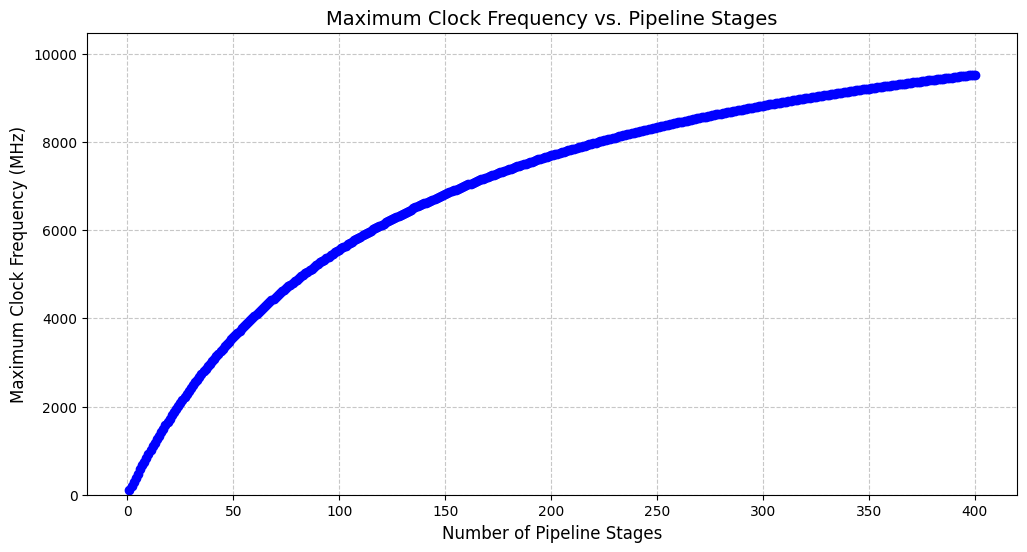

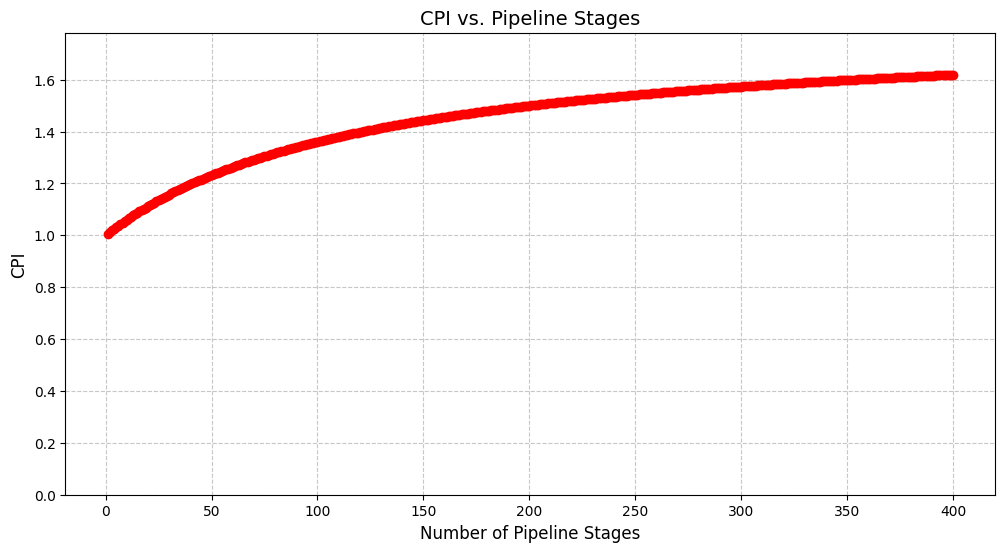

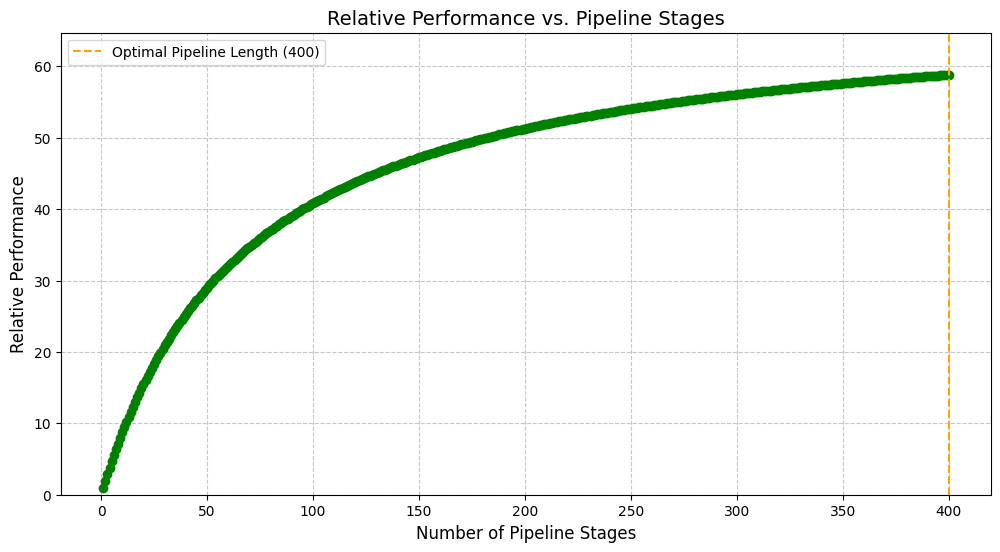

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
T_branch_resolution = 6.5e-9  # Branch resolution latency in seconds (6.5 ns)
branch_frequency = 0.2  # 1 in 5 instructions are branches
branch_misprediction_rate = 0.05  # 95% branch prediction accuracy

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 401)  # Vary stages from 1 to 400

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate CPI for each pipeline stage
cycle_time = 1 / frequencies  # Cycle time in seconds
branch_penalty_cycles = T_branch_resolution / cycle_time
cpi_branch = branch_frequency * branch_misprediction_rate * branch_penalty_cycles
cpi = 1 + cpi_branch  # Total CPI

# Calculate performance relative to the non-pipelined implementation
non_pipelined_frequency = 1 / T_critical_path  # Non-pipelined frequency
non_pipelined_cpi = 1  # CPI for non-pipelined implementation
non_pipelined_performance = non_pipelined_frequency / non_pipelined_cpi
performance_relative = (frequencies / cpi) / non_pipelined_performance

# Find the performance-optimal pipeline length
optimal_stage_index = np.argmax(performance_relative)  # Index of max performance
optimal_pipeline_length = pipeline_stages[optimal_stage_index]
optimal_performance = performance_relative[optimal_stage_index]

print(f"Performance-optimal pipeline length: {optimal_pipeline_length} stages")
print(f"Maximum relative performance: {optimal_performance:.2f}")

# Plotting Maximum Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting CPI
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, cpi, marker='o', linestyle='-', color='red')
plt.title('CPI vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(cpi) * 1.1)
plt.show()

# Plotting Relative Performance
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, performance_relative, marker='o', linestyle='-', color='green')
plt.title('Relative Performance vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Relative Performance', fontsize=12)
plt.axvline(x=optimal_pipeline_length, color='orange', linestyle='--', label=f'Optimal Pipeline Length ({optimal_pipeline_length})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(performance_relative) * 1.1)
plt.show()


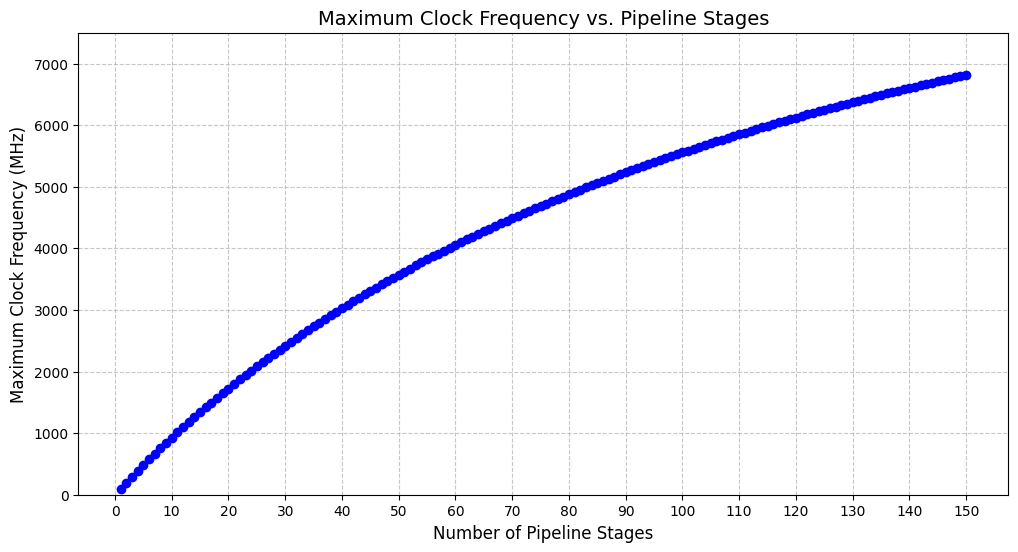

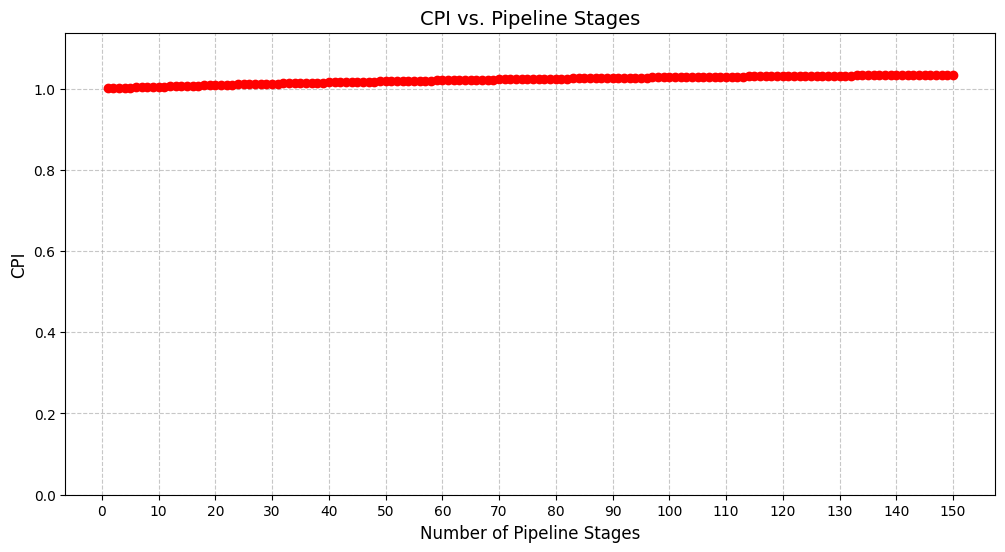

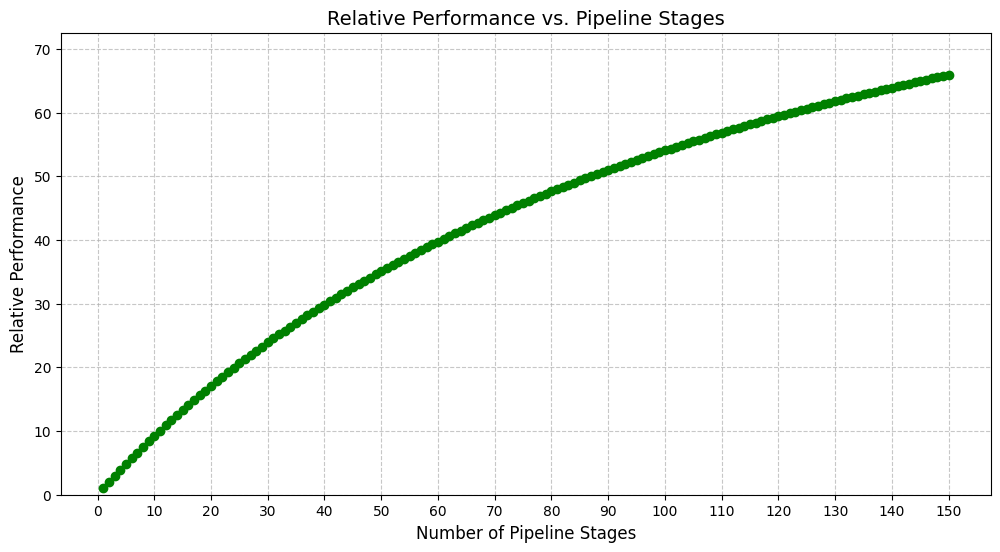

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
T_cache_miss = 2e-9  # Cache miss penalty in seconds (2 ns)
load_frequency = 1 / 8  # 1 in 8 instructions are loads
cache_miss_rate = 0.02  # Cache miss rate (2%)

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 151)  # Vary stages from 1 to 150

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate CPI for each pipeline stage
cycle_time = 1 / frequencies  # Cycle time in seconds
cache_miss_penalty_cycles = T_cache_miss / cycle_time  # Cache miss penalty in cycles
cpi_cache = load_frequency * cache_miss_rate * cache_miss_penalty_cycles  # Cache-related CPI
cpi = 1 + cpi_cache  # Total CPI

# Calculate performance relative to the non-pipelined implementation
non_pipelined_frequency = 1 / T_critical_path  # Non-pipelined frequency
non_pipelined_cpi = 1  # CPI for non-pipelined implementation
non_pipelined_performance = non_pipelined_frequency / non_pipelined_cpi
performance_relative = (frequencies / cpi) / non_pipelined_performance

# Plotting Maximum Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting CPI
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, cpi, marker='o', linestyle='-', color='red')
plt.title('CPI vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(cpi) * 1.1)
plt.show()

# Plotting Relative Performance
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, performance_relative, marker='o', linestyle='-', color='green')
plt.title('Relative Performance vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Relative Performance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 151, 10))
plt.ylim(0, np.max(performance_relative) * 1.1)
plt.show()


Performance-optimal pipeline length: 400 stages
Maximum relative performance: 90.91


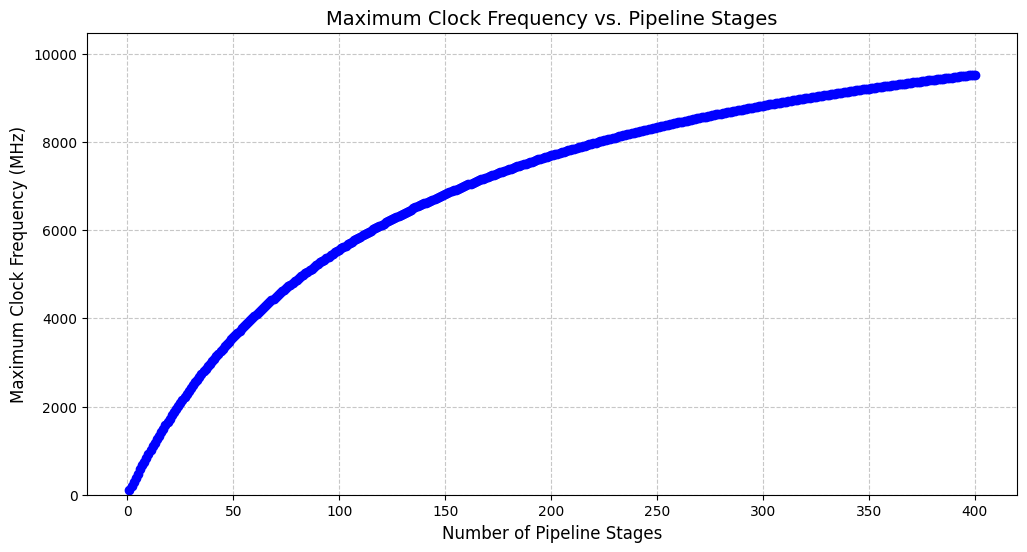

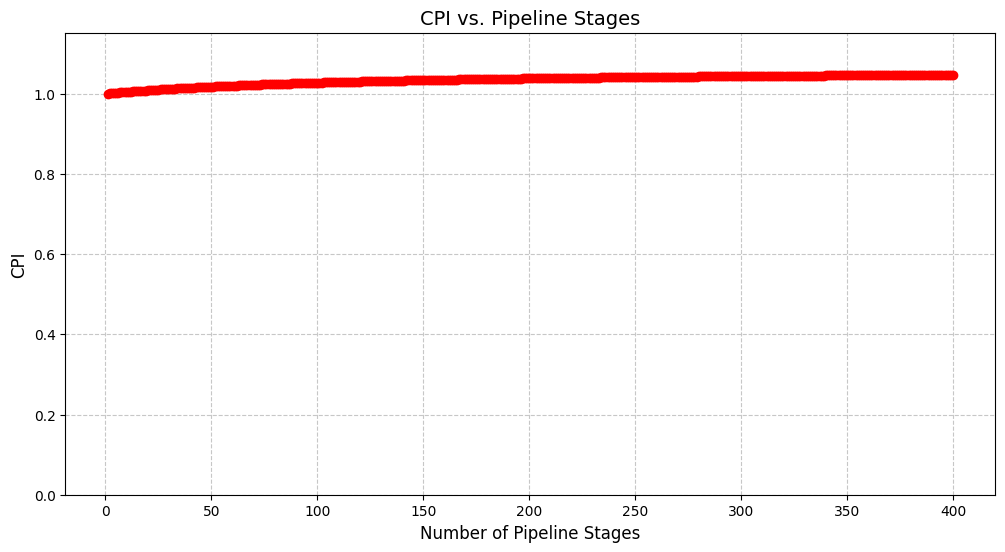

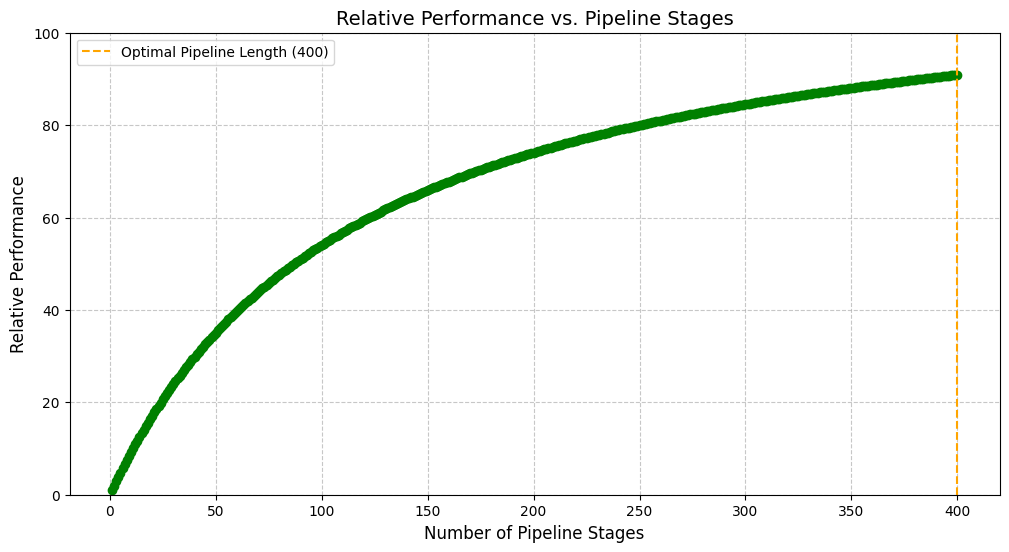

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_critical_path = 10e-9  # Critical path delay in seconds (10 ns)
T_latch_latency = 80e-12  # Latch latency in seconds (80 ps)
T_cache_miss = 2e-9  # Cache miss penalty in seconds (2 ns)
load_frequency = 1 / 8  # 1 in 8 instructions are loads
cache_miss_rate = 0.02  # Cache miss rate (2%)

# Number of pipeline stages (k values)
pipeline_stages = np.arange(1, 401)  # Vary stages from 1 to 400

# Calculate maximum clock frequency for each pipeline stage
frequencies = 1 / ((T_critical_path / pipeline_stages) + T_latch_latency)
frequencies_mhz = frequencies / 1e6  # Convert frequency to MHz

# Calculate CPI for each pipeline stage
cycle_time = 1 / frequencies  # Cycle time in seconds
cache_miss_penalty_cycles = T_cache_miss / cycle_time  # Cache miss penalty in cycles
cpi_cache = load_frequency * cache_miss_rate * cache_miss_penalty_cycles  # Cache-related CPI
cpi = 1 + cpi_cache  # Total CPI

# Calculate performance relative to the non-pipelined implementation
non_pipelined_frequency = 1 / T_critical_path  # Non-pipelined frequency
non_pipelined_cpi = 1  # CPI for non-pipelined implementation
non_pipelined_performance = non_pipelined_frequency / non_pipelined_cpi
performance_relative = (frequencies / cpi) / non_pipelined_performance

# Find the performance-optimal pipeline length
optimal_stage_index = np.argmax(performance_relative)  # Index of max performance
optimal_pipeline_length = pipeline_stages[optimal_stage_index]
optimal_performance = performance_relative[optimal_stage_index]

print(f"Performance-optimal pipeline length: {optimal_pipeline_length} stages")
print(f"Maximum relative performance: {optimal_performance:.2f}")

# Plotting Maximum Frequency
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, frequencies_mhz, marker='o', linestyle='-', color='blue')
plt.title('Maximum Clock Frequency vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Maximum Clock Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(frequencies_mhz) * 1.1)
plt.show()

# Plotting CPI
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, cpi, marker='o', linestyle='-', color='red')
plt.title('CPI vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(cpi) * 1.1)
plt.show()

# Plotting Relative Performance
plt.figure(figsize=(12, 6))
plt.plot(pipeline_stages, performance_relative, marker='o', linestyle='-', color='green')
plt.title('Relative Performance vs. Pipeline Stages', fontsize=14)
plt.xlabel('Number of Pipeline Stages', fontsize=12)
plt.ylabel('Relative Performance', fontsize=12)
plt.axvline(x=optimal_pipeline_length, color='orange', linestyle='--', label=f'Optimal Pipeline Length ({optimal_pipeline_length})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 401, 50))
plt.ylim(0, np.max(performance_relative) * 1.1)
plt.show()
